## Import usefull packages

In [ ]:
import numpy as np
from my_utils import load_data, plot_data, split_humanly, split_humanly_v2, get_cross_validated_subjects 
from sklearn.model_selection import train_test_split
import random
from tensorflow import keras
import pandas as pd
import os

## Fetching the dataset

In [ ]:
print("It may take 2-3 minutes to load the entire dataset...\n")
x, y, names = load_data(path="data/10/", function="difference" , normalization=True)
print("Shape of the X:", x.shape)
print("Shape of the Y:", y.shape)

It may take 2-3 minutes to load the entire dataset...

Shape of the X: (2941, 1000, 8)
Shape of the Y: (2941, 1)


## Splitting humans

Two ways to split the (patient and control) subjects is implemented:
1. Split in a balanced way.(approximately the same distribution for patients and control subjects)
2. unbalanced distribution.

Obviously the first method is recommended in order to achieve higher accuracy. But it reduces the samples of patient subjects at all.(The dataset which was used for this study is not balanced initially.)

In [ ]:
print("It may take about 1 minute ...\n")
train_x, train_y, valid_x, valid_y, test_x, test_y = split_humanly(x, y, names)

print("Shape of the train_x:", train_x.shape, ", shape of the train_y:", train_y.shape)
print("Shape of the valid_x:", valid_x.shape, ", shape of the valid_y:", valid_y.shape)
print("Shape of the test_x:", test_x.shape, ", shape of the test_y:", test_y.shape)
print("number of the training examples: ", train_x.shape[0])
print("length of the sequence: ", train_x.shape[1])
print("number of unique valuese: ", train_x.shape[2])

It may take about 1 minute ...

-total train: 156 -Pt in train: 78 -Co in train: 78
-total valid: 10 -Pt in valid: 5 -Co in valid: 5
-total test: 16 -Pt in test: 8 -Co in test: 8
Shape of the train_x: (1503, 1000, 8) , shape of the train_y: (1503, 1)
Shape of the valid_x: (88, 1000, 8) , shape of the valid_y: (88, 1)
Shape of the test_x: (166, 1000, 8) , shape of the test_y: (166, 1)
number of the training examples:  1503
length of the sequence:  1000
number of unique valuese:  8


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.40, random_state=42)
valid_x, test_x, valid_y, test_y = train_test_split(test_x, test_y, test_size=0.66, random_state=42)  # train60 valid14 test26

print("Shape of the train_x:", train_x.shape, ", shape of the train_y:", train_y.shape)
print("Shape of the valid_x:", valid_x.shape, ", shape of the valid_y:", valid_y.shape)
print("Shape of the test_x:", test_x.shape, ", shape of the test_y:", test_y.shape)
print("number of the training examples: ", train_x.shape[0])
print("length of the sequence: ", train_x.shape[1])
print("number of unique valuese: ", train_x.shape[2])


Shape of the train_x: (1770, 1000, 8) , shape of the train_y: (1770, 1)
Shape of the valid_x: (401, 1000, 8) , shape of the valid_y: (401, 1)
Shape of the test_x: (779, 1000, 8) , shape of the test_y: (779, 1)
number of the training examples:  1770
length of the sequence:  1000
number of unique valuese:  8


##Cross validation

Due to the manuall splitting method which is used for this project, the cross validation is also implemented manually to achive balanced distribution for train and test examples.

In [ ]:
patients, controls = get_cross_validated_subjects(x, y, names, n_folds=10)

In [ ]:


fold = 9     #fold's number

subjects_pt_train_all = patients[0]
subjects_pt_train_idx_all = patients[1]
subjects_pt_test_all = patients[2]
subjects_pt_test_idx_all = patients[3]
n_fold_train_samples = patients[4]
n_fold_test_samples = patients[5]


pt_name_train_x = np.asarray(subjects_pt_train_all[n_fold_train_samples[fold] : ])
pt_name_train_y = np.asarray(subjects_pt_train_idx_all[n_fold_train_samples[fold] :], dtype=int)
pt_name_test_x = np.asarray(subjects_pt_test_all[n_fold_test_samples[fold]: ])
pt_name_test_y = np.asarray(subjects_pt_test_idx_all[n_fold_test_samples[fold]: ], dtype=int)

#n_fold_test_samples[fold + 1]
#n_fold_train_samples[fold + 1]

subjects_co_train_all = controls[0]
subjects_co_train_idx_all = controls[1]
subjects_co_test_all = controls[2]
subjects_co_test_idx_all = controls[3]
n_fold_train_samples = controls[4]
n_fold_test_samples = controls[5]

co_name_train_x = np.asarray(subjects_co_train_all[n_fold_train_samples[fold]: ])
co_name_train_y = np.asarray(subjects_co_train_idx_all[n_fold_train_samples[fold]: ], dtype=int)
co_name_test_x = np.asarray(subjects_co_test_all[n_fold_test_samples[fold]:])
co_name_test_y = np.asarray(subjects_co_test_idx_all[n_fold_test_samples[fold]: ], dtype=int)



train_x, train_y, test_x, test_y = split_humanly_v2(x, y, names, pt_name_train_x, pt_name_test_x, pt_name_train_y, pt_name_test_y, co_name_train_x,
                      co_name_test_x, co_name_train_y, co_name_test_y)


print("Shape of the train_x:", train_x.shape, ", shape of the train_y:", train_y.shape)
print("Shape of the test_x:", test_x.shape, ", shape of the test_y:", test_y.shape)
print("number of the training examples: ", train_x.shape[0])
print("length of the sequence: ", train_x.shape[1])
print("number of unique valuese: ", train_x.shape[2])

-total train: 182 -Pt in train: 91 -Co in train: 91
-total test: 18 -Pt in test: 9 -Co in test: 9
Shape of the train_x: (1146, 1500, 16) , shape of the train_y: (1146, 1)
Shape of the test_x: (113, 1500, 16) , shape of the test_y: (113, 1)
number of the training examples:  1146
length of the sequence:  1500
number of unique valuese:  16


## Plot a random sample

A PDF file will be generated in project directory after running this cell. 

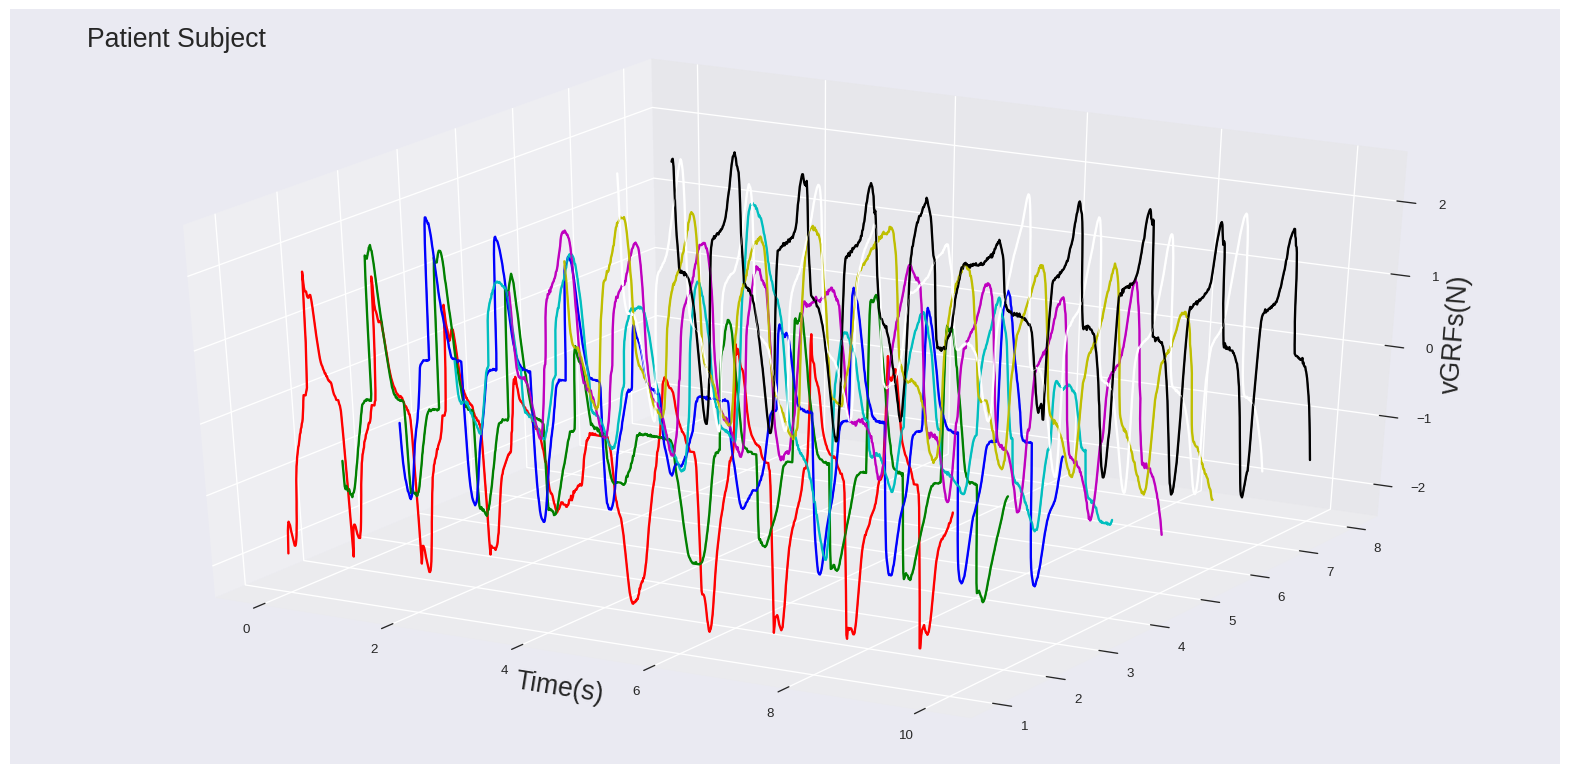

<Figure size 576x396 with 0 Axes>

In [ ]:
rand_ith_sample = random.randint(0, train_x.shape[0])
plot_data(train_x[rand_ith_sample,:,:], train_y[rand_ith_sample,:], save_type='.pdf')

## Unidirectional LSTM

In [ ]:

model = keras.models.Sequential([
    keras.layers.LSTM(64, dropout=0.25, return_sequences=True),
    keras.layers.LSTM(32, dropout=0.25),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid") 
])

## Bidirectional LSTM

In [ ]:

model = keras.models.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(64, dropout=0.25, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32, dropout=0.25)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid") 
])

## GRU

In [ ]:

model = keras.models.Sequential([
    keras.layers.GRU(32, dropout=0.25),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid") 
])

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=(["accuracy"])) # binary_crossentropy is a suitable loss for binary classification

In [ ]:
history = model.fit(train_x,train_y,epochs=150,validation_data=(test_x,test_y)) # training based on X_tr and y_tr using X_val and y_val to stop the learning procedure

Epoch 1/150
36/36 [==============================] - 7s 205ms/step - loss: 0.6954 - accuracy: 0.4983 - val_loss: 0.6822 - val_accuracy: 0.5575
Epoch 2/150
36/36 [==============================] - 6s 173ms/step - loss: 0.6852 - accuracy: 0.5419 - val_loss: 0.6639 - val_accuracy: 0.6283
Epoch 3/150
36/36 [==============================] - 6s 172ms/step - loss: 0.6734 - accuracy: 0.5812 - val_loss: 0.6507 - val_accuracy: 0.6372
Epoch 4/150
36/36 [==============================] - 6s 172ms/step - loss: 0.6601 - accuracy: 0.6265 - val_loss: 0.5469 - val_accuracy: 0.8496
Epoch 5/150
36/36 [==============================] - 6s 175ms/step - loss: 0.5941 - accuracy: 0.7086 - val_loss: 0.4235 - val_accuracy: 0.8761
Epoch 6/150
36/36 [==============================] - 6s 175ms/step - loss: 0.5845 - accuracy: 0.7007 - val_loss: 0.4239 - val_accuracy: 0.9027
Epoch 7/150
36/36 [==============================] - 6s 174ms/step - loss: 0.6082 - accuracy: 0.6780 - val_loss: 0.5218 - val_accuracy: 0.7434

In [ ]:
model.summary()
exp = "exp84-bidirectional-time_slice:15-all_sensors-fold09/"
os.mkdir('weights/' + exp)
model.save_weights('weights/' + exp + exp.split("/")[0])

from contextlib import redirect_stdout

with open('weights/'+ exp + 'modelsummary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_20 (Bidirectio (None, 1500, 128)         41472     
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dense_52 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5         
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________

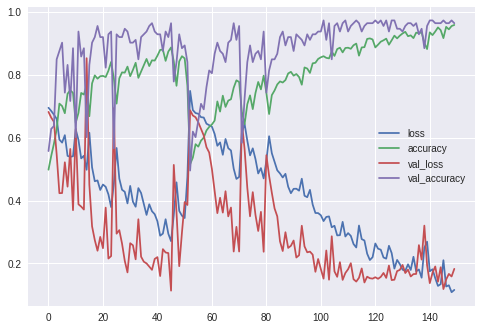

In [ ]:
pd.DataFrame(history.history).plot() # to plot changing error in respect to iteration number

## Evaluation

In [ ]:
exp = "exp84-bidirectional-time_slice:15-all_sensors-fold09/"
model.load_weights('weights/' + exp + exp.split("/")[0])
r = model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 77ms/step - loss: 0.1826 - accuracy: 0.9646


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def accuracy_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    acc = (true_positives+true_negatives) / (len(y_true) + K.epsilon())
    return acc

In [ ]:
results = model.predict(train_x)
print("train recall:", recall_m(train_y, results))
print("train precision:", precision_m(train_y.astype(np.float32), results.astype(np.float32)))
print("train accuracy:", accuracy_m(train_y.astype(np.float32), results.astype(np.float32)))

results = model.predict(test_x)
print("\ntest recall", recall_m(test_y, results))
print("test precision", precision_m(test_y.astype(np.float32), results.astype(np.float32)))
print("test accuracy", accuracy_m(test_y.astype(np.float32), results.astype(np.float32)))

train recall: tf.Tensor(0.9965095984299286, shape=(), dtype=float64)
train precision: tf.Tensor(0.93914473, shape=(), dtype=float32)
train accuracy: tf.Tensor(0.9659686, shape=(), dtype=float32)

test recall tf.Tensor(0.9310344811533888, shape=(), dtype=float64)
test precision tf.Tensor(1.0, shape=(), dtype=float32)
test accuracy tf.Tensor(0.96460176, shape=(), dtype=float32)
